# Chem 277B - Fall 2024 - Homework 1 
## Naive Bayes and PCA
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Sept 23 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**<br>
<br>
## Problem (25 P)

Write a Python script **AnalyzeMolecules** using *def*, that performs the following analysis:<br>
<br>
1) Loading the molecule data set *"molecular_test_gbc.xlsx"* and *"molecular_train_gbc.xlsx"*<br>
2) Creating a plot showing Pearsons' correlation of all features in *"molecular_train_gbc.xlsx"* in a heatmap (see Fig 1)<br>
3) Running a classification using **Naive Bayes**, both with a Multinomial Prior and Gaussian Prior. Don't forget scaling and normalization!<br>
4) Running the same classification as in 3) but after having performed a PCA. How does the accuracy change?<br>
5) Creating a bar plot of the eigenvalue spectrum and a scatter plot for the data in those coordinates with the three largest eigenvalues (see Fig 2 and 3, respectively)
   

<br>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap

from sklearn.naive_bayes import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


def AnalyzeMolecules():
    
    ###############################################################################
    #molecule data set
    ###############################################################################

    Data          = pd.read_csv('molecular_train_gbc.csv')
    Data.index    = Data['label']
    Data          = Data.drop('label', axis = 1)

    Test          = pd.read_csv('molecular_test_gbc.csv')
    Test.index    = Test['label']
    TestX         = Test.drop('label', axis = 1)
    TestY         = Test.index

    All           = pd.concat((Data, TestX), axis = 0)
    (rows, _)     = Data.shape

    #scaling and normalization
    scaler        = MinMaxScaler(feature_range=(0, 1))
    AllN          = scaler.fit_transform(All)
    DataN         = pd.DataFrame(AllN[:rows,:])
    DataN.index   = Data.index
    DataN.columns = Data.columns
    Data          = DataN.copy()

    sns.heatmap(Data.corr())
    plt.title('training data set')
    plt.show()

    out = PCA(n_components = 5).fit(Data)

    eigenVec = out.components_
    eigenVal = out.explained_variance_
    eigenXYZ = out.transform(Data)

    xplot = np.arange(1,6)

    plt.bar(xplot, eigenVal, color = (0.8, 0.8, 0.8), edgecolor = 'black')
    plt.xlabel('dimension')
    plt.ylabel('eigenvalue')
    plt.yscale('log')
    plt.xticks(xplot)
    plt.show()

    NonToxic  = [eigenXYZ[i,:] for i, s in enumerate(Data.index) if s == 'Non-Toxic']
    Toxic     = [eigenXYZ[i,:] for i, s in enumerate(Data.index) if s == 'Toxic']

    NonToxic  = np.array(NonToxic)
    Toxic     = np.array(Toxic)

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(NonToxic[:,0], NonToxic[:,1], NonToxic[:,2], alpha = 0.3, c = 'black', marker = 'o', s = 40, label = 'non toxic')
    ax.legend()
    ax.scatter(Toxic[:,0], Toxic[:,1], Toxic[:,2], alpha = 0.3, c = 'red', marker = 'o', s = 40, label = 'toxic')
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
    plt.show()

    ###########################################################################
    #performing NB now
    ###########################################################################
    #scaling and normalization
    TestXN         = pd.DataFrame(AllN[rows:,:])
    TestXN.index   = TestX.index
    TestXN.columns = TestX.columns
    TestX          = TestXN.copy()

    TestXPCA       =  out.transform(TestX)
#-----------------------------------------------------------------------------
    TrainY = Data.index 
    #before PCA
    #1) Gaussian NB
    TrainX = Data
    
    gnb    = GaussianNB()
    y_pred = gnb.fit(TrainX, TrainY).predict(TestX)
    
    #2) Multinomial NB
    mnb    = MultinomialNB()
    y_pred = mnb.fit(TrainX - np.min(TrainX), TrainY).predict(TestX - np.min(TestX))

    print("GaussianNB before PCA: Number of mislabelled points out of a total %d points : %d"
          % (TestX.shape[0], (TestY != y_pred).sum()))

    #2) Multinomial NB
    mnb    = MultinomialNB()
    y_pred = mnb.fit(TrainX - np.min(TrainX), TrainY).predict(TestXPCA - np.min(TestXPCA))

    print("MultinomialNB before PCA: Number of mislabelled points out of a total %d points : %d"
          % (TestX.shape[0], (TestY != y_pred).sum()))
#-----------------------------------------------------------------------------
    #After PCA
    #1) Gaussian NB
    TrainX = eigenXYZ
    
    gnb    = GaussianNB()
    y_pred = gnb.fit(TrainX, TrainY).predict(TestXPCA)
    
    #2) Multinomial NB
    mnb    = MultinomialNB()
    y_pred = mnb.fit(TrainX - np.min(TrainX), TrainY).predict(TestXPCA - np.min(TestXPCA))

    print("GaussianNB after PCA: Number of mislabelled points out of a total %d points : %d"
          % (TestX.shape[0], (TestY != y_pred).sum()))

    #2) Multinomial NB
    mnb    = MultinomialNB()
    y_pred = mnb.fit(TrainX - np.min(TrainX), TrainY).predict(TestXPCA - np.min(TestXPCA))

    print("MultinomialNB after PCA: Number of mislabelled points out of a total %d points : %d"
          % (TestX.shape[0], (TestY != y_pred).sum()))
    

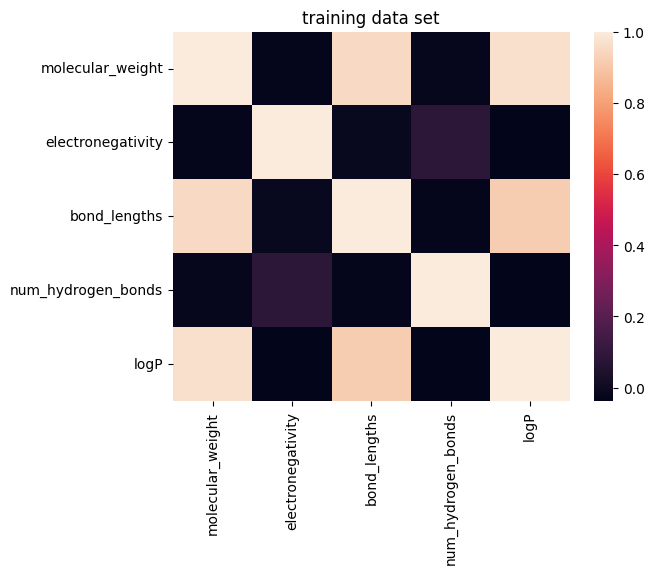

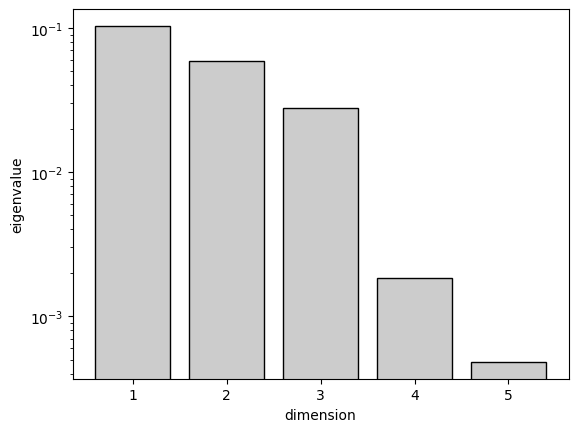

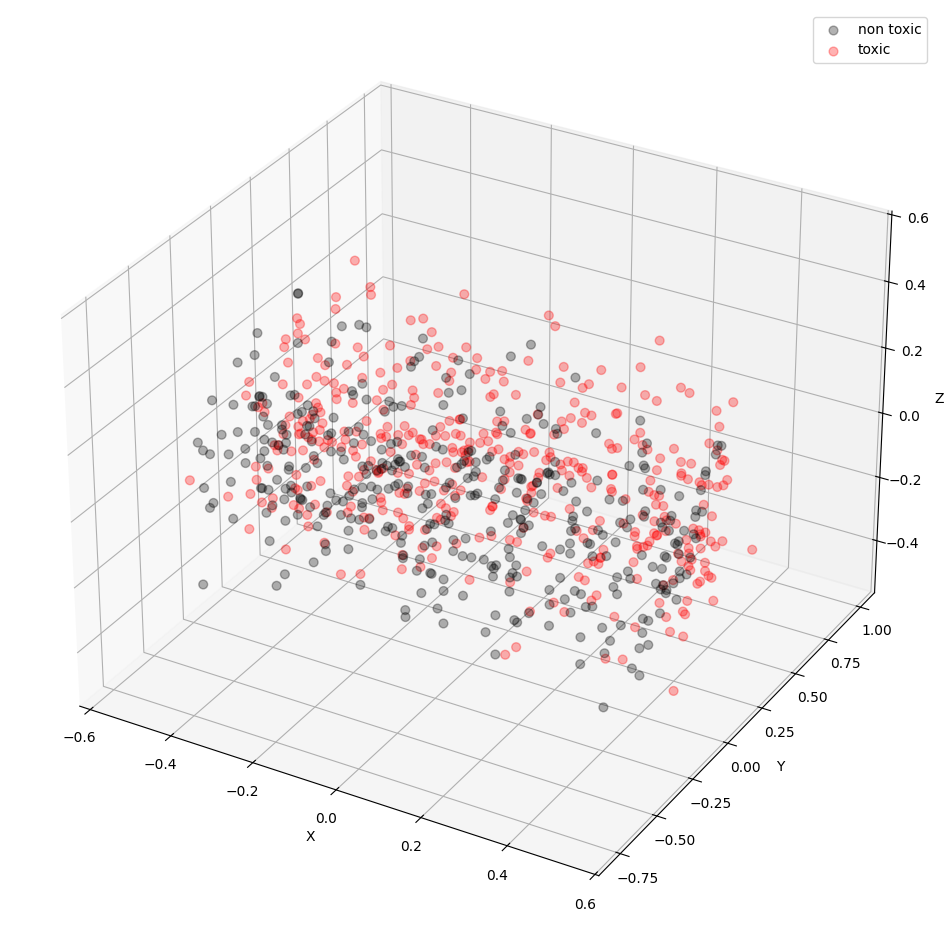

GaussianNB before PCA: Number of mislabelled points out of a total 200 points : 65
MultinomialNB before PCA: Number of mislabelled points out of a total 200 points : 113
GaussianNB after PCA: Number of mislabelled points out of a total 200 points : 81
MultinomialNB after PCA: Number of mislabelled points out of a total 200 points : 81


C:\Users\MMH_user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [14]:
AnalyzeMolecules()